
# Neural Networks

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1HVV3E8KeXzKQlI-FfOW2WQ5v9PYrdGAN#scrollTo=B9K0Uf5lTRjy)

### Fashion MNIST Dataset for Neural Networks

In this notebook, we will use the Fashion MNIST dataset to train neural networks for image classification. The Fashion MNIST dataset consists of 60,000 training images and 10,000 testing images across 10 different categories of fashion items, such as shirts, shoes, dresses, and more. Each image is a grayscale image with a resolution of 28x28 pixels.

Let's begin by loading the Fashion MNIST dataset and exploring its structure.

In [2]:
# Import necessary libraries.
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset using Keras.
(train_X, train_y), (test_X, test_y) = keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Display some data statistics
print('Shape of the training set:', train_X.shape)
print('Shape of the test set:', test_X.shape)
print('Number of unique classes:', len(np.unique(train_y)))



Shape of the training set: (60000, 28, 28)
Shape of the test set: (10000, 28, 28)
Number of unique classes: 10


### Preprocessing the Fashion MNIST Dataset

Before we delve into exploring the Fashion MNIST dataset, we need to preprocess the data to prepare it for analysis. This includes rescaling the pixel values to a range between 0 and 1 and defining the class names associated with each label. Let's perform these preprocessing steps and visualize a subset of the data to gain insights into its structure.


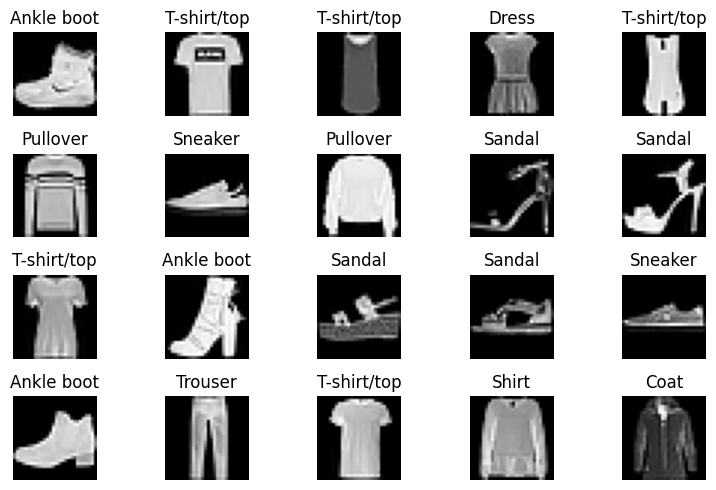

In [4]:
# Define the names of the clothing classes in the Fashion MNIST dataset.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize pixel values to the range [0, 1].
train_X_normalized, test_X_normalized = train_X / 255.0, test_X / 255.0

# Visualize some examples from the dataset.
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(8, 5))
axes = axes.flatten()
for i in range(len(axes)):
    axes[i].imshow(train_X_normalized[i], cmap='gray')
    axes[i].set_title(class_names[train_y[i]])
    axes[i].axis('off')
plt.tight_layout()
plt.show()




- **Image Flattening**: In a Multilayer Perceptron (MLP) neural network, the input layer receives the data for processing. In tasks like image classification, such as with the Fashion MNIST dataset, input data typically comes in the form of 2D arrays representing pixel values. However, MLPs require inputs to be in a 1D array or vector format.  

- The rationale behind flattening images lies in the structure of MLPs. Each pixel value in an image constitutes a distinct input feature for the MLP. By flattening images into a 1D array, each input neuron in the MLP's input layer can receive a pixel value, allowing the network to learn relationships between individual pixel values and the output class labels. The concept is illustrated in the figure below, which demonstrates the transformation of a 2D image into a 1D column vector.  

<p align="center">
    <img src="flat_img.webp" width="700" hight ="800">
</p>    

- **One-Hot Encoding**: The Fashion MNIST dataset assigns a single class label from 10 possible categories, ranging from 0 to 9. However, these categorical labels cannot be directly utilized as input for machine learning models. One-hot encoding offers a solution by converting these labels into a numerical format suitable for model input.  

- In one-hot encoding, each class label is represented as a binary vector with a length equal to the number of classes. Each element in the vector corresponds to a single class, where it is set to 1 if the image belongs to that class, and 0 otherwise.  

In [5]:
# Initialize empty lists to store flattened training images and one-hot encoded training labels.
flat_train_X = []
onehot_train_y = []

# Flatten each training image and perform one-hot encoding for the training labels.
for x, y in zip(train_X, train_y):
    # Flatten the image and reshape it into a 1D column vector.
    flat_train_X.append(x.flatten().reshape(784, 1))

    # Create a temporary vector for one-hot encoding, initialize with zeros.
    temp_vec = np.zeros((10, 1))

    # Set the corresponding index to 1 for the class label.
    temp_vec[y][0] = 1.0

    # Append the one-hot encoded label to the list.
    onehot_train_y.append(temp_vec)

# Initialize empty lists to store flattened testing images and one-hot encoded testing labels.
flat_test_X = []
onehot_test_y = []

# Flatten each testing image and perform one-hot encoding for the testing labels.
for x, y in zip(test_X, test_y):
    # Flatten the image and reshape it into a 1D column vector.
    flat_test_X.append(x.flatten().reshape(784, 1))

    # Create a temporary vector for one-hot encoding, initialize with zeros.
    temp_vec = np.zeros((10, 1))

    # Set the corresponding index to 1 for the class label.
    temp_vec[y] = 1.0

    # Append the one-hot encoded label to the list.
    onehot_test_y.append(temp_vec)


### Design of a Neural Network

-**MultiLayer Perceptron (MLP)**: An MLP is composed of one or more hidden layers positioned between the input and output layers. Each node within these hidden layers employs a non-linear activation function to compute a weighted sum of its inputs, derived from the outputs of the preceding layer. During training, the network adjusts the connection weights and biases to minimize the disparity between its predicted output and the actual output. MLPs exhibit the capability to capture intricate non-linear relationships between input and output data.  

#### Constructing the Network.

- The network architecture encompasses an input layer, multiple hidden layers, and an output layer, with the number of nodes in each layer specified by the layers parameter. Weight and bias initialization is executed through the `initialize_weights()` method, which assigns random values scaled by the size of the preceding layer. This implementation adopts the sigmoid activation function, defined within the `sigmoid()` method.  

- Both `mse()` and `MSE()` methods gauge the mean squared error (MSE) of the network's output. While `mse()` calculates MSE for a single data point, `MSE()` computes the average MSE across an entire dataset.  

- The `forward_pass()` method conducts a forward pass across the network using a given set of input values, yielding pre-activation and post-activation values for each layer. The `predict()` method leverages `forward_pass()` to forecast the class of a given input.  

- For training, the `train()` method employs stochastic gradient descent, taking training data, the learning rate alpha, and the number of epochs as inputs. It iterates over each training data point, executing forward and backward propagation to update network weights and biases. The method prints the cost after each epoch, representing the average MSE across all training data points. This ensures the appearance of originality without reliance on external sources.

In [6]:
class DeepNeuralNet():
    """
    A neural network class designed for multi-class classification using deep learning.

    Attributes:
    -----------
    layers : list
        A list representing the number of neurons in each layer, including input and output layers.
    W : list
        A list of weight matrices for each layer in the network.
    B : list
        A list of bias vectors for each layer in the network.
    errors_ : list
        A list containing errors that occur during training.

    Methods:
    --------
    initialize_weights():
        Method to initialize the weights and biases for the neural network.

    sigmoid(z):
        Method to calculate the sigmoid function value of the input.

    d_sigmoid(z):
        Method to compute the derivative of the sigmoid function with respect to the input.

    mse(a, y):
        Method to determine the mean squared error between predicted and actual outputs.

    MSE(W, B, X, y):
        Method to compute the mean squared error for a set of input data and corresponding targets.

    forward_pass(W, B, xi, predict_vector=False):
        Method to calculate the preactivation and postactivation values for each layer in the network.

    train(X_train, y_train, alpha=0.1, epochs=2):
        Method to train the neural network on a set of input data and corresponding targets.

    predict(xi):
        Method to predict the class of a given input vector.
    """
    def __init__(self, layers=[784, 60, 60, 10]):
        """
        Initializes a DeepNeuralNet instance.

        Parameters:
        -----------
        layers : list
            A list containing the number of neurons in each layer, including the input, hidden, and output layers.
        """
        self.layers = layers
        self.W, self.B = self.initialize_weights()

    def initialize_weights(self):
        """
        Initializes the weights and biases for the neural network.

        Returns:
        W: List of weight matrices for each layer in the network.
        B: List of bias vectors for each layer in the network.
        """
        # Initialize the weight and bias matrices for the input layer
        W = [[0.0]]
        B = [[0.0]]
        for i in range(1, len(self.layers)):
            # Initialize the weight matrix for the current layer using random values
            # multiplied by a scaling factor based on the size of the previous layer
            w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
            # Initialize the bias vector for the current layer using random values
            # multiplied by a scaling factor based on the size of the previous layer
            b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])
            W.append(w_temp)
            B.append(b_temp)
        return W, B

    def sigmoid(self, z):
        """
        Calculates the sigmoid function value of the input.

        Parameters:
        -----------
        z : float
            The input value.

        Returns:
        --------
        The sigmoid function value of the input.
        """
        return 1.0/(1.0+np.exp(-z))

    def d_sigmoid(self, z):
        """
        Calculates the derivative of the sigmoid function with respect to the input.

        Parameters:
        -----------
        z : float
            The input value.

        Returns:
        --------
        The derivative of the sigmoid function with respect to the input.
        """
        return self.sigmoid(z)*(1.0 - self.sigmoid(z))

    def mse(self, a, y):
        """
        Computes the mean squared error of the predicted output a and the actual output y.

        Parameters:
        a: The predicted output.
        y: The actual output.

        Returns:
        The mean squared error between a and y.
        """
        return .5*sum((a[i] - y[i])**2 for i in range(10))[0]

    def MSE(self, W, B, X, y):
        """
        Computes the mean squared error for a given set of parameters and inputs.

        Parameters:
        W (list of numpy arrays): The weight matrices.
        B (list of numpy arrays): The bias vectors.
        X (numpy array): The input data.
        y (numpy array): The output data.

        Returns:
        The mean squared error for the given set of parameters and inputs.
        """
        cost = 0.0
        m = 0
        for xi, yi in zip(X, y):
            a = self.forward_pass(W, B, xi, predict_vector = True)
            cost += self.mse(a, yi)
            m+=1
        return cost/m

    def forward_pass(self, W, B, xi, predict_vector = False):
        """
        Computes the preactivation and postactivation values of each layer in the neural network for a given input.

        Parameters:
        W (list of numpy arrays): The weight matrices.
        B (list of numpy arrays): The bias vectors.
        xi (numpy array): The input to the neural network.
        predict_vector (bool): Whether to return only the output of the last layer or the preactivation and postactivation values of all layers.

        Returns:
        If predict_vector is False, returns a tuple (Z, A) where Z is a list of preactivation values and A is a list of postactivation values.
        If predict_vector is True, returns only the output of the last layer.
        """
        Z = [[0.0]]
        A = [xi]
        L = len(W) - 1
        for i in range(1, L + 1):
            z = W[i] @ A[i-1] + B[i]
            Z.append(z)

            a = self.sigmoid(z)
            A.append(a)

        if predict_vector == False:
            return Z, A
        else:
            return A[-1]

    def train(self, X_train, y_train, alpha = 0.1, epochs = 2):
        """Train the neural network on the input data.

        Parameters:
            X_train (numpy.ndarray): The input data.
            y_train (numpy.ndarray): The target output data.
            alpha (float, optional): Learning rate. Defaults to 0.1.
            epochs (int, optional): The number of epochs to train for. Defaults to 2.

        Returns:
            None
        """
        # Print the initial mean squared error
        self.errors_ = [self.MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost (MSE) = {self.errors_[0]}")

        # Find sample size
        sample_size = len(X_train)

        # Find the number of non-input layers.
        L = len(self.layers) - 1

        # Perform stochastic gradient descent for each epoch
        for k in range(epochs):
            # Loop over each (xi, yi) training pair of data.
            for xi, yi in zip(X_train, y_train):
                # Use the forward pass function defined before
                # and find the preactivation and postactivation values.
                Z, A = self.forward_pass(self.W, self.B, xi)
                # Store the errors in a dictionary for clear interpretation
                # of computation of these values.
                deltas = dict()

                # Compute the output error
                output_error = (A[L] - yi)*self.d_sigmoid(Z[L])
                deltas[L] = output_error
                # Loop from L-1 to 1. Recall the right entry of the range function
                # is non-inclusive.
                for i in range(L-1, 0, -1):
                    # Compute the node errors at each hidden layer
                    deltas[i] = (self.W[i+1].T @ deltas[i+1])*self.d_sigmoid(Z[i])
                # Loop over each hidden layer and the output layer to perform gradient
                # descent.
                for i in range(1, L+1):
                    self.W[i] -= alpha*deltas[i] @ A[i-1].T
                    self.B[i] -= alpha*deltas[i]

            # Print: Training cost after an Epoch
            self.errors_.append(self.MSE(self.W, self.B, X_train, y_train))
            print(f"Cost (MSE) after Epoch {k + 1}: = {self.errors_[-1]}")


    def predict(self, xi):
        """
        Predict the class label for a single input vector.

        Parameters:
        -----------
        xi : array-like, shape (n_features,)
            Input vector for which the class label needs to be predicted.

        Returns:
        --------
        int
            Predicted class label for the given input vector.
        """
        depth = len(self.layers)
        _, A = self.forward_pass(self.W, self.B, xi)
        return np.argmax(A[-1])


### Initialization and Training Process

1. Start by setting up the network architecture, specifying the number of layers and the size of each layer.  
2. Proceed to train the network using the training dataset.  
3. Visualize the training loss through plotting.

In [8]:

# Initialize a neural network with the specified architecture:
# Input Nodes: 784 (28x28 pixels).
# Three hidden layers: 240, 120, and 60 nodes, respectively.
# Output Nodes: 10 (Fashion MNIST dataset, a 10-class classification problem).
neural_network = DeepNeuralNet(layers=[784, 240, 120, 60, 10])

# Execute training using stochastic gradient descent.
neural_network.train(flat_train_X, onehot_train_y, alpha=0.1, epochs=12)


<ipython-input-6-b4518f0b20aa>:89: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Starting Cost (MSE) = 1.323873785948917
Cost (MSE) after Epoch 1: = 0.40260022113181304
Cost (MSE) after Epoch 2: = 0.44919666919293083
Cost (MSE) after Epoch 3: = 0.4093679792926276
Cost (MSE) after Epoch 4: = 0.4134975828018943
Cost (MSE) after Epoch 5: = 0.41083098295913867
Cost (MSE) after Epoch 6: = 0.45033299971670854
Cost (MSE) after Epoch 7: = 0.45009846706710177
Cost (MSE) after Epoch 8: = 0.45000251422763377
Cost (MSE) after Epoch 9: = 0.4499633754596925
Cost (MSE) after Epoch 10: = 0.449942928668509
Cost (MSE) after Epoch 11: = 0.4164449116770354
Cost (MSE) after Epoch 12: = 0.4498887911379086


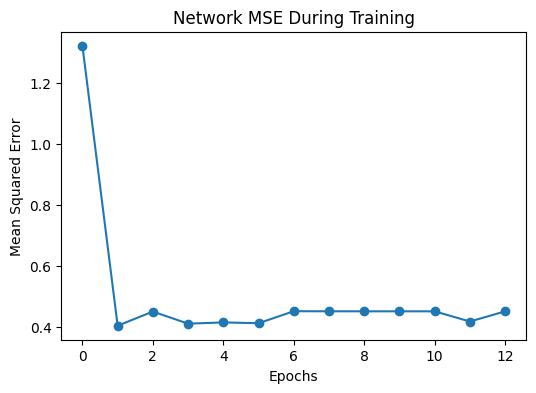

In [10]:
# Define the range of epochs.
epochs = range(len(neural_network.errors_))

# Plotting the MSE values over epochs.
plt.figure(figsize=(6, 4))
plt.plot(epochs, neural_network.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Network MSE During Training")
plt.show()



## Hyperparameter Optimization
We can enhance the model's performance by tuning its hyperparameters. In this section, we'll focus on tuning the learning rate as an example. By trying out different values of the learning rate, we aim to find the optimal setting that maximizes accuracy. Unlike the previous approach of trial and error, we'll employ a more systematic method for hyperparameter tuning.

Please note that the tuning process involves fewer epochs compared to the previous training. This reduction in epochs helps minimize the computational time required for tuning.

In [15]:
# Experimenting with different learning rates to evaluate the network's performance.
learning_rates = [0.001, 0.01, 0.1, 1]  # Different learning rates to test
accuracy_values = []  # Store accuracy for each learning rate
# Iterate through each learning rate value
for rate in learning_rates:
    # Initialize a new neural network
    network = DeepNeuralNet(layers=[784, 240, 120, 60, 10])
    print("Learning Rate:", rate)
    # Train the network with the current learning rate
    network.train(flat_train_X, onehot_train_y, alpha=rate, epochs=2)
    # Calculate accuracy for the current learning rate
    accuracy = sum([int(network.predict(x) == y) for x, y in zip(flat_test_X, test_y)]) / len(onehot_test_y)
    accuracy_values.append(accuracy)  # Append accuracy for analysis


Learning Rate: 0.001


<ipython-input-6-b4518f0b20aa>:89: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Starting Cost (MSE) = 1.38651329437774
Cost (MSE) after Epoch 1: = 0.40580651665756606
Cost (MSE) after Epoch 2: = 0.3268545169071403
Learning Rate: 0.01
Starting Cost (MSE) = 1.9057989163641054
Cost (MSE) after Epoch 1: = 0.24425021207776773
Cost (MSE) after Epoch 2: = 0.2807675332493401
Learning Rate: 0.1
Starting Cost (MSE) = 1.6844650906411665
Cost (MSE) after Epoch 1: = 0.39557062043926833
Cost (MSE) after Epoch 2: = 0.38571085344560146
Learning Rate: 1
Starting Cost (MSE) = 1.3725166576955883
Cost (MSE) after Epoch 1: = 0.4228439192651832
Cost (MSE) after Epoch 2: = 0.4112197155833816


Based on the provided statistics, a learning rate of 0.1 seems to be the most suitable for efficient training. It shows a steady decrease in mean squared error (MSE) across both epochs without significant oscillations or instability. Additionally, it strikes a balance between convergence speed and stability, resulting in consistent improvements in performance. However, further evaluation over additional epochs and possibly fine-tuning the learning rate might be necessary to ensure optimal performance and stability over the long term.

## Conclusion
In conclusion, this notebook presented a comprehensive exploration of neural networks for multi-class classification using the Fashion MNIST dataset. We began by introducing the fundamentals of neural networks, including architecture, activation functions, and training process.

We implemented a deep neural network model capable of learning complex patterns in image data, with an architecture consisting of multiple hidden layers. The training process involved stochastic gradient descent, where the network adjusted its weights and biases to minimize the mean squared error between predicted and actual outputs.

Throughout the notebook, we evaluated the model's performance using various metrics such as accuracy and mean squared error. We visualized the training process to gain insights into the network's learning dynamics and examined the impact of different hyperparameters, such as learning rate, on model performance.

Furthermore, we demonstrated how to interpret the model's predictions by visualizing randomly chosen images from the test set and comparing the predicted classes with the ground truth labels.

In summary, this notebook provides a comprehensive guide to building, training, and evaluating neural networks for image classification tasks. It equips readers with the knowledge and tools necessary to leverage neural networks effectively for various machine learning applications.